In [707]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
from numpy.fft import fft, fftfreq, fftshift, ifft
pi = np.pi

# 1a

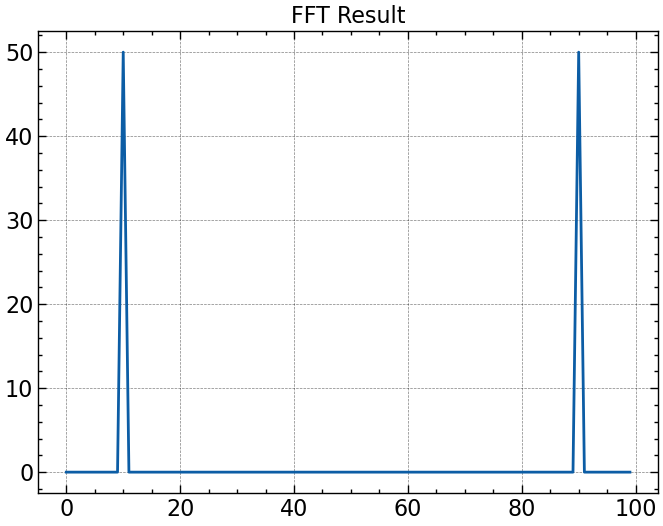

In [708]:
N = np.arange(100) # sample size
t = 0.1*pi*N # discretize time

# function that generates cos(wt)
def generate_data(time, omega):
    return np.cos(omega*time)
d = generate_data(t, omega=2)
sp = np.fft.fft(d) # applying FFT
plt.plot(N, np.abs(sp))
plt.title("FFT Result")
plt.show()

# 1b

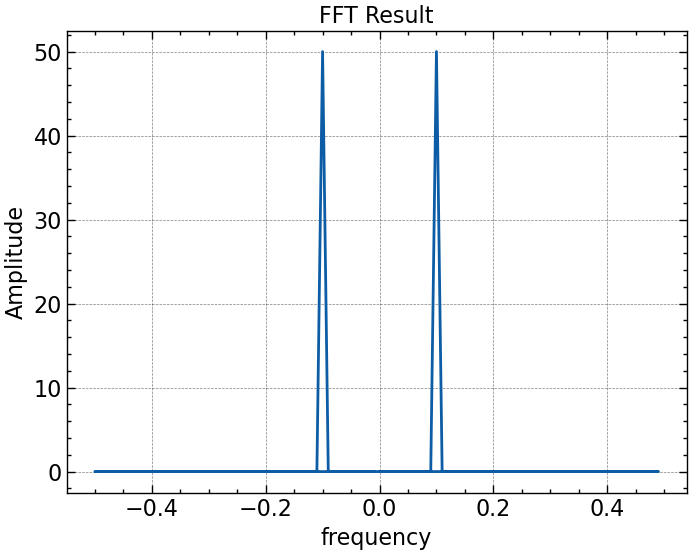

In [709]:
freq = np.fft.fftfreq(N.shape[-1]) # transform the frequency
plt.plot(freq, np.abs(sp))
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.title("FFT Result")
plt.show()

# 1c

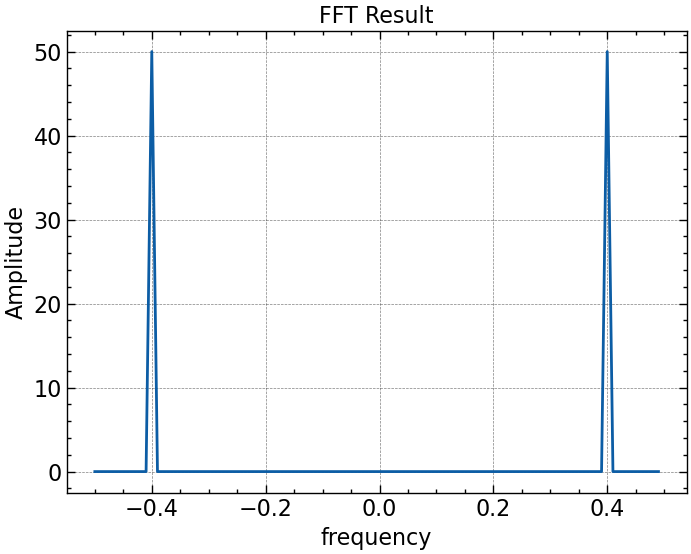

In [710]:
plt.plot(np.fft.fftshift(freq), np.abs(sp))
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.title("FFT Result")
plt.show()

fftshift(freq) essentially swaps the half-spaces of the input array

# 1d

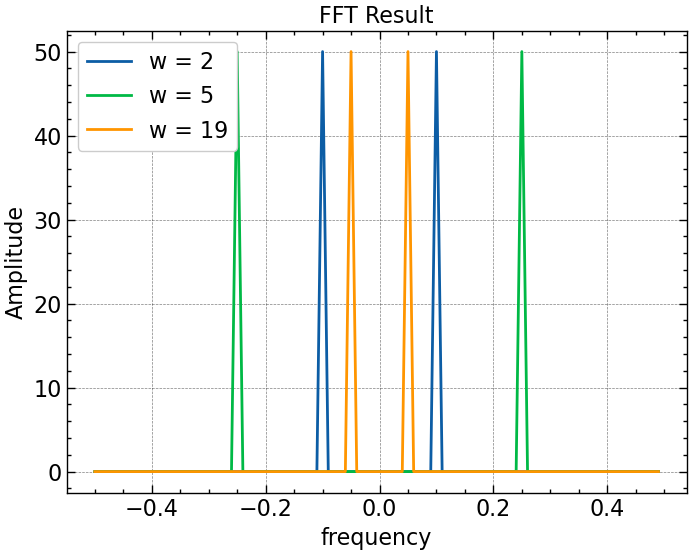

In [711]:
d2 = generate_data(t, omega=5)
d3 = generate_data(t, omega=19)

sp2 = np.fft.fft(d2)
sp3 = np.fft.fft(d3)

plt.plot(fftshift(freq), fftshift(np.abs(sp)), label = "w = 2")
plt.plot(fftshift(freq), fftshift(np.abs(sp2)), label = "w = 5")
plt.plot(fftshift(freq), fftshift(np.abs(sp3)), label = "w = 19")
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.title("FFT Result")
plt.legend()
plt.show()

The peak for w=19 does not align with the input values. The reason for this is that our sampling did not capture the real signal of w=19 case. See plot in 1e for visualization.

# 1e

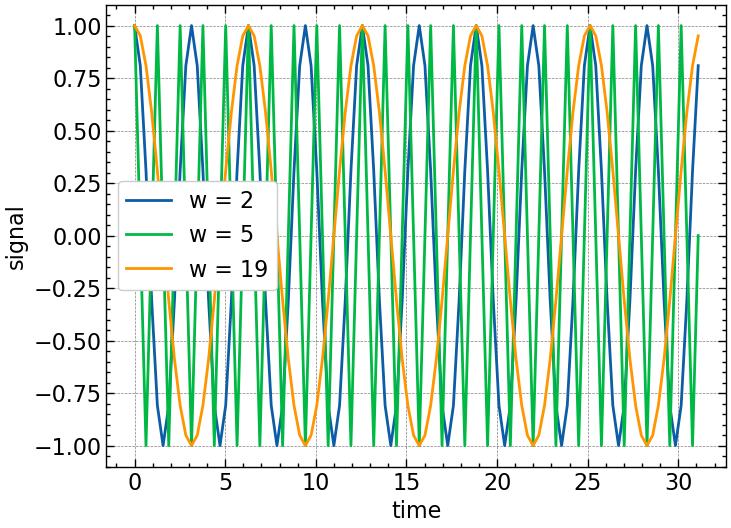

In [712]:
fig, ax = plt.subplots()
ax.plot(t, d, label = "w = 2")
ax.plot(t, d2, label = "w = 5")
ax.plot(t, d3, label = "w = 19")
ax.set_xlabel("time")
ax.set_ylabel("signal")
plt.legend()
plt.show()

# 1f

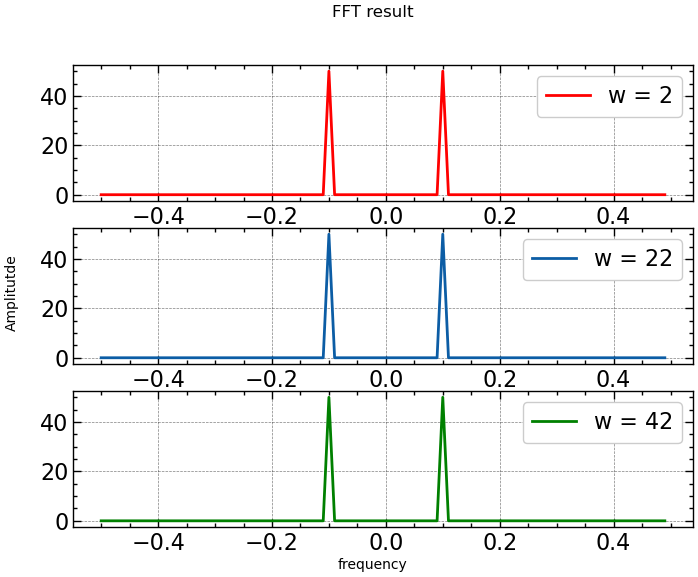

In [713]:
# plotting fft result for case when omega = 22
d4 = generate_data(t, omega = 22)
d5 = generate_data(t, omega = 42)
sp4 = fft(d4)
sp5 = fft(d5)

fig, ax = plt.subplots(3,1)
ax[0].plot(fftshift(freq), fftshift(np.abs(sp)), color = 'red', label = "w = 2")
ax[1].plot(fftshift(freq), fftshift(np.abs(sp4)), label = "w = 22")
ax[2].plot(fftshift(freq), fftshift(np.abs(sp5)), label = "w = 42", color = 'green')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.suptitle("FFT result")
fig.text(0.5, 0.04, 'frequency', ha='center')
fig.text(0.04, 0.5, 'Amplitutde', va='center', rotation='vertical')
plt.show()

The Nyquist frequency for this sampling is 10. So at any frequency that is twice the Nyquist frequency, we will get the same fourier transform. Namely, w = 22, w = 42, and so on.

# 2a

Text(0.5, 1.0, 'Signal Plot')

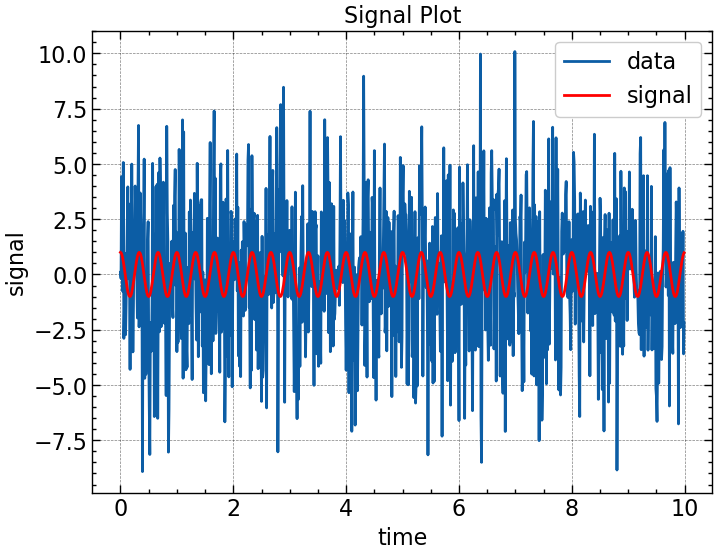

In [714]:
N = np.arange(1000)
t = 0.01* N
d = np.cos(6*pi*t) + np.random.normal(0, 3, 1000)
signal = np.cos(6*pi*t)
plt.plot(t, d, label = "data")
plt.plot(t, signal, label = "signal", color = 'red')
plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("Signal Plot")

# 2b

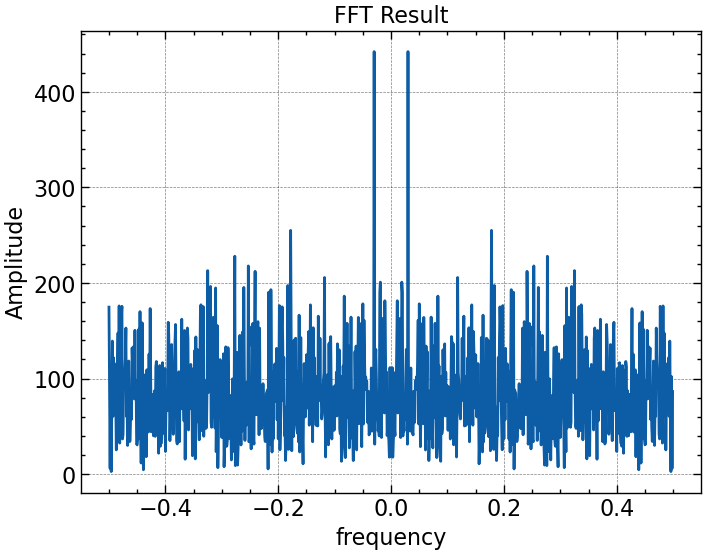

average:  85.72448379637493 Max:  442.09864138286684


In [715]:
sp = fft(d)
freq = fftfreq(N.shape[-1])
plt.plot(fftshift(freq), fftshift(np.abs(sp))) #plotting fourier transform against freq
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.title("FFT Result")
plt.show()

# calculating average and peak
average = np.mean(np.abs(sp))
peak = np.max(np.abs(sp))
print("average: ", average, "Max: ", peak)

As we can see, the average is extremely small when compared to the peak in the FFT result plot.

# 2c

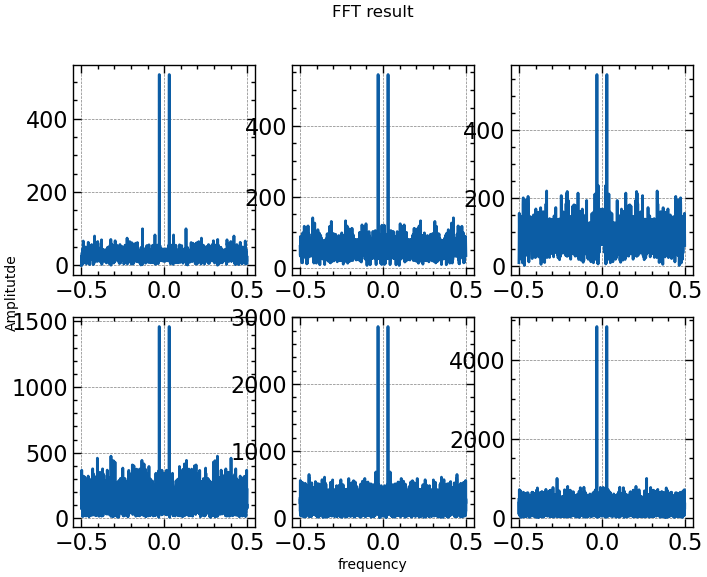

average:  29.038110122878994 Max:  520.3572433358667
average:  54.4715262609708 Max:  544.1096344828122
average:  86.9649583551774 Max:  564.0512716103409
average:  147.43624403918207 Max:  1460.972192741404
average:  206.38419488905691 Max:  2861.164830436657
average:  253.66519899495816 Max:  4835.7309189093


In [716]:
# 6 sets of datas
# first 3 sets vary the variance
# second 3 sets vary sample size

fig, ax = plt.subplots(2,3)

N1 = np.arange(1000)
t1 = 0.01* N1
d1 = np.cos(6*pi*t1) + np.random.normal(0, 1, 1000)
sp1 = fft(d1)
freq = fftfreq(N1.shape[-1])
ax[0][0].plot(fftshift(freq), np.abs(fftshift(sp1)))

N2 = np.arange(1000)
t2 = 0.01* N2
d2 = np.cos(6*pi*t2) + np.random.normal(0, 2, 1000)
sp2 = fft(d2)
freq = fftfreq(N2.shape[-1])
ax[0][1].plot(fftshift(freq), np.abs(fftshift(sp2)))

N3 = np.arange(1000)
t3 = 0.01* N3
d3 = np.cos(6*pi*t3) + np.random.normal(0, 3, 1000)
sp3 = fft(d3)
freq = fftfreq(N3.shape[-1])
ax[0][2].plot(fftshift(freq), np.abs(fftshift(sp3)))

N4 = np.arange(3000)
t4 = 0.01* N4
d4 = np.cos(6*pi*t4) + np.random.normal(0, 3, 3000)
sp4 = fft(d4)
freq = fftfreq(N4.shape[-1])
ax[1][0].plot(fftshift(freq), np.abs(fftshift(sp4)))

N5 = np.arange(6000)
t5 = 0.01* N5
d5 = np.cos(6*pi*t5) + np.random.normal(0, 3, 6000)
sp5 = fft(d5)
freq = fftfreq(N5.shape[-1])
ax[1][1].plot(fftshift(freq), np.abs(fftshift(sp5)))

N6 = np.arange(9000)
t6 = 0.01* N6
d6 = np.cos(6*pi*t6) + np.random.normal(0, 3, 9000)
sp6 = fft(d6)
freq = fftfreq(N6.shape[-1])
ax[1][2].plot(fftshift(freq), np.abs(fftshift(sp6)))

plt.suptitle("FFT result")
fig.text(0.5, 0.04, 'frequency', ha='center')
fig.text(0.04, 0.5, 'Amplitutde', va='center', rotation='vertical')
plt.show()

average = np.mean(np.abs(sp1))
peak = np.max(np.abs(sp1))
print("average: ", average, "Max: ", peak)


average = np.mean(np.abs(sp2))
peak = np.max(np.abs(sp2))
print("average: ", average, "Max: ", peak)

average = np.mean(np.abs(sp3))
peak = np.max(np.abs(sp3))
print("average: ", average, "Max: ", peak)

average = np.mean(np.abs(sp4))
peak = np.max(np.abs(sp4))
print("average: ", average, "Max: ", peak)

average = np.mean(np.abs(sp5))
peak = np.max(np.abs(sp5))
print("average: ", average, "Max: ", peak)

average = np.mean(np.abs(sp6))
peak = np.max(np.abs(sp6))
print("average: ", average, "Max: ", peak)

From the frist 3 case, we see that the noise scale linearly with the standard deviation. 
However, we see from the second 3 cases that, the signal increase linearly as we increase size N, whereas the noise only increase with the square root of N. This is what make FFT useful.

# 3a

One thing to note to perform the DFT is that the data set is discrete. During the convulution calculation, the h(t) function will be accessed from the negative index. If we initialize h(t) as the normal gaussian discretization, then the FFT algorithm will access the right side of the graph when evaluating the negative index, which is not the behaviour that we want since the right side of the graph is essentially zero in this case. Thus, we want to initialize h(t) in a special manner shown below, which correctly for the periodicity of FFT and the negative indexing during convulution.

In [717]:
t = np.arange(100)* 0.1*pi
dt = t[-1]/t.size
# initializing g and h
g = np.exp(-t/20)*np.cos(5*t)
h = np.exp(-(t**2/(2*0.1)))/np.sqrt(2*pi*0.1) + np.exp(-((t-100*0.1*pi)**2/(2*0.1)))/np.sqrt(2*pi*0.1)

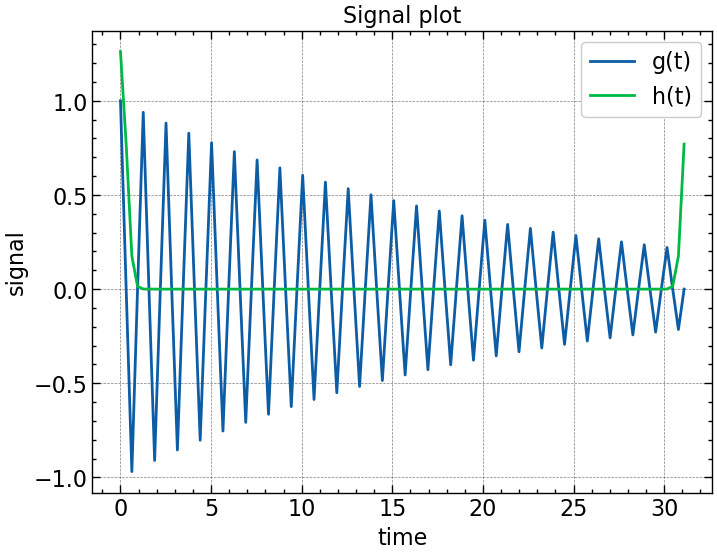

In [718]:
plt.plot(t, g, label = "g(t)")
plt.plot(t, h, label = "h(t)")
plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("Signal plot")
plt.show()

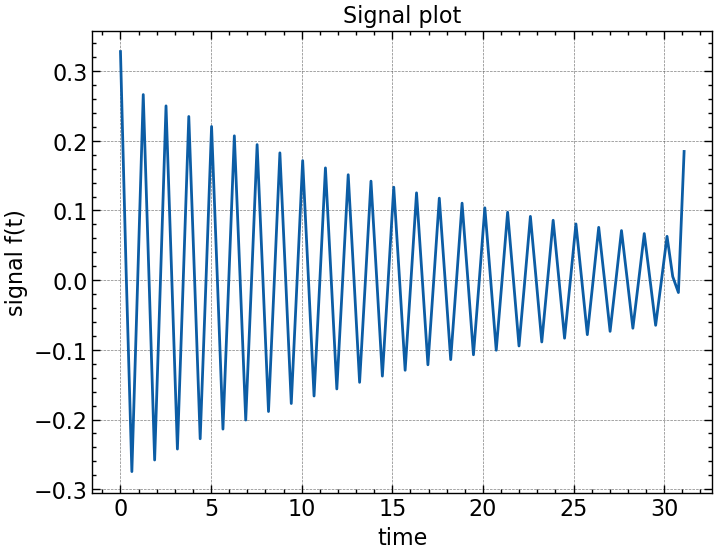

In [719]:
sp_g = fft(g)
sp_h = fft(h)
# fourier transform result's product is the convulution
sp_f = sp_g*sp_h

# inverse fourier transform
f = ifft(sp_f)*dt # delta_t from the summation.
plt.plot(t, np.real(f))
plt.xlabel("time")
plt.ylabel("signal f(t)")
plt.title("Signal plot")
plt.show()


# 3b

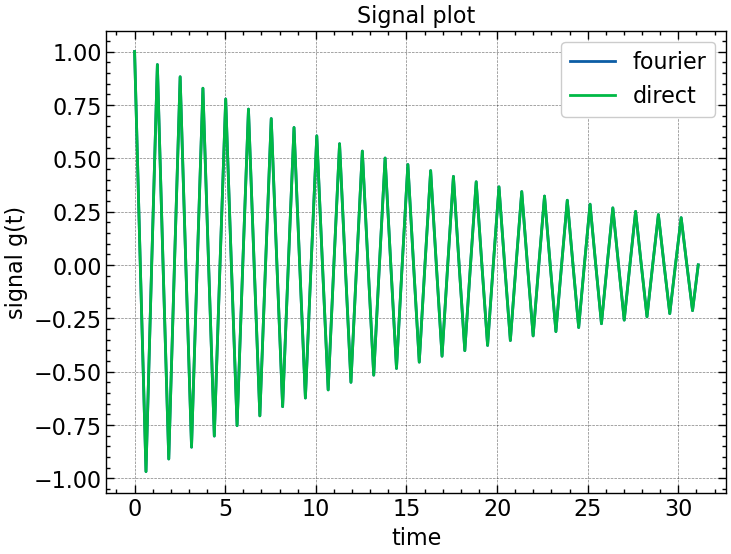

In [720]:
sp_f = fft(f)
sp_g = sp_f/sp_h
g_f = ifft(sp_g)

plt.plot(t, np.real(g_f)/dt, label = "fourier")
plt.plot(t, g, label = "direct")
plt.xlabel("time")
plt.ylabel("signal g(t)")
plt.title("Signal plot")
plt.legend()
plt.show()

As comparing with the plot in 3a, this g(t) is essentially identical, which means that we have recover the g(t) from the convulution process.

# 3c

Text(0.5, 1.0, 'Signal plot')

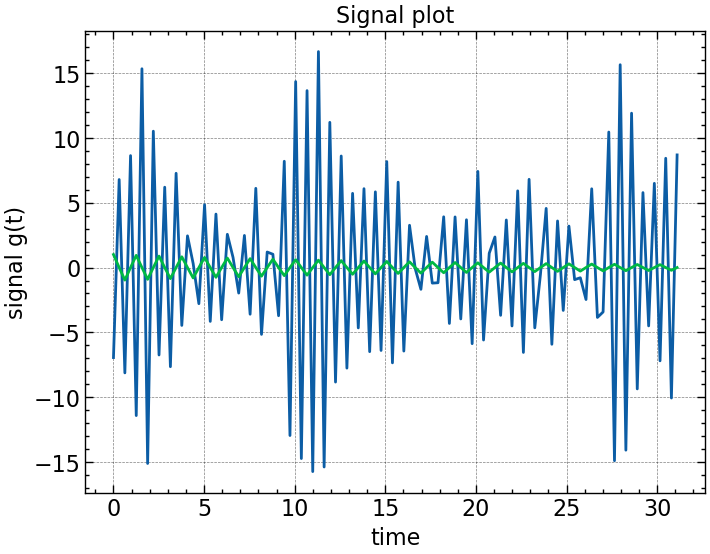

In [721]:
f_noise = f + np.random.normal(0, 0.3, 100)
sp_f = fft(f_noise)
sp_g = sp_f/sp_h
g_noise = ifft(sp_g)
plt.plot(t, np.real(g_noise)/dt)
plt.plot(t, np.real(g_f)/dt)
plt.xlabel("time")
plt.ylabel("signal g(t)")
plt.title("Signal plot")


As we can see from this result, the addition of noise greatly impact our result of g(t). The amplitude is greatly enhanced.